# Cats dogs redux

We have replicated the data structure and are now ready to roll.

In [1]:
%matplotlib inline

In [2]:
path = "data/sample/"

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth = 100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using Theano backend.


In [5]:
batch_size = 32
from vgg16 import Vgg16
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [7]:
batches = vgg.get_batches(path + 'train', batch_size =4)

Found 50 images belonging to 2 classes.


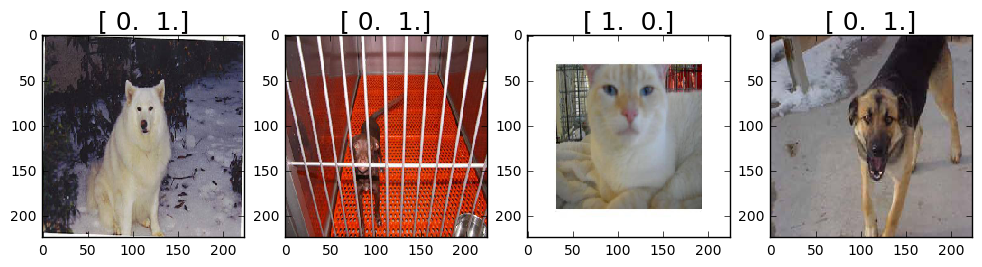

In [8]:
imgs, labels = next(batches)
plots(imgs, titles = labels)

In [9]:
vgg.predict(imgs, True)

(array([ 0.5655,  0.8232,  0.3226,  0.5761], dtype=float32),
 array([248, 743, 285, 235]),
 [u'Eskimo_dog', u'prison', u'Egyptian_cat', u'German_shepherd'])

This looks quite promising, really. We now should really re-train for cats and dogs. off we go!

Great. We can now proceed with finetuning this model. Maybe even on a t2.large instance. Let's see if that works.
# Finetuning

In [11]:
batch_size = 32
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)


Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [12]:
vgg.finetune(batches)

In [13]:
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
50/50 [==============================] - 799s - loss: 1.9557 - acc: 0.6400 - val_loss: 0.4301 - val_acc: 0.9000


This looks reasonable. We really should do this stuff on a p2 instance and finetune on the entire training data.

In [14]:
vgg.predict(imgs, True)

(array([ 0.992 ,  0.9952,  0.9917,  0.9978], dtype=float32),
 array([0, 0, 0, 1]),
 [u'tench', u'tench', u'tench', u'goldfish'])